In [2]:
import pandas as pd

caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

df = pd.read_csv(caminho_do_arquivo)

df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
# Remove vírgulas e o sinal de dólar da coluna 'Gross'
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '')

# Remove a palavra "min" e espaços da coluna 'Runtime'
df['Runtime'] = df['Runtime'].str.replace(' min', '').str.strip()

# Converte as colunas para o tipo numérico (integer)
df['Gross'] = pd.to_numeric(df['Gross'])
df['Runtime'] = pd.to_numeric(df['Runtime'])

# Exibe as informações para confirmar que os tipos foram alterados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB
None


In [4]:
# Cria uma lista com todos os gêneros do dataset
all_genres = df['Genre'].str.split(', ').explode()

# Conta a frequência de cada gênero
genre_counts = all_genres.value_counts()

# Exibe os 10 gêneros mais comuns
print(genre_counts.head(10))

# Cria um gráfico para visualizar a distribuição dos gêneros
plt.figure(figsize=(10, 6))
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis')
plt.title('Distribuição de Gêneros')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

Genre
Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


NameError: name 'plt' is not defined

Genre
Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


C:\Users\rodri\AppData\Local\Temp\ipykernel_29252\592849517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis')


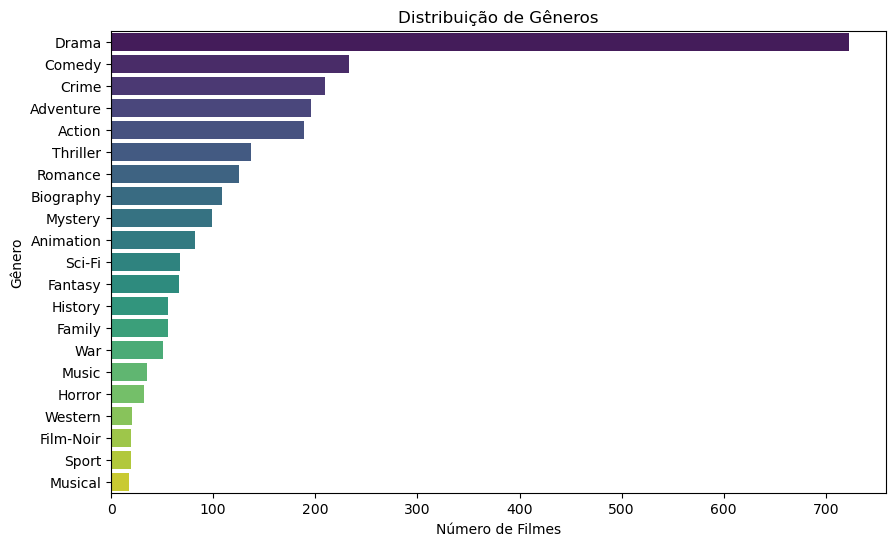

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_genres = df['Genre'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

print(genre_counts.head(10))

plt.figure(figsize=(10, 6))
sns.countplot(y=all_genres, order=all_genres.value_counts().index, palette='viridis')
plt.title('Distribuição de Gêneros')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()


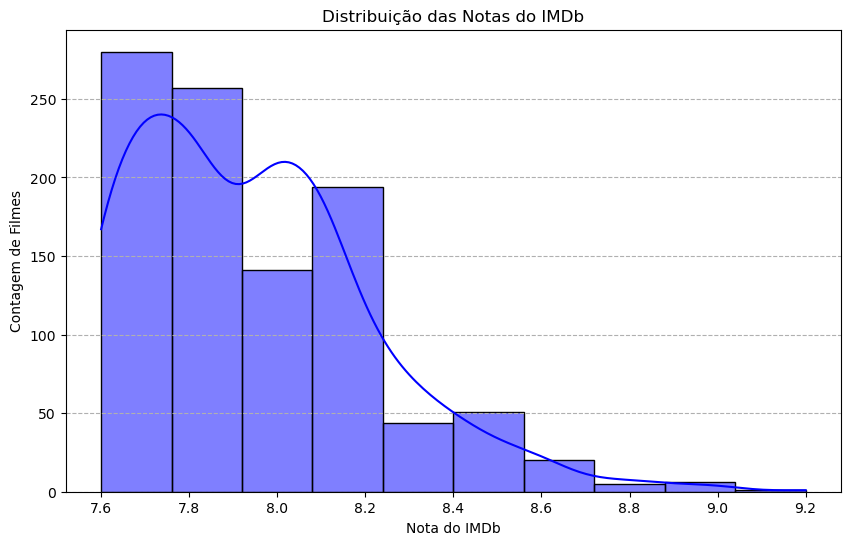

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64


In [6]:
# Analisa a distribuição das notas do IMDb
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=10, kde=True, color='blue')
plt.title('Distribuição das Notas do IMDb')
plt.xlabel('Nota do IMDb')
plt.ylabel('Contagem de Filmes')
plt.grid(axis='y', linestyle='--')
plt.show()

# Exibe estatísticas descritivas para a coluna de notas
print(df['IMDB_Rating'].describe())

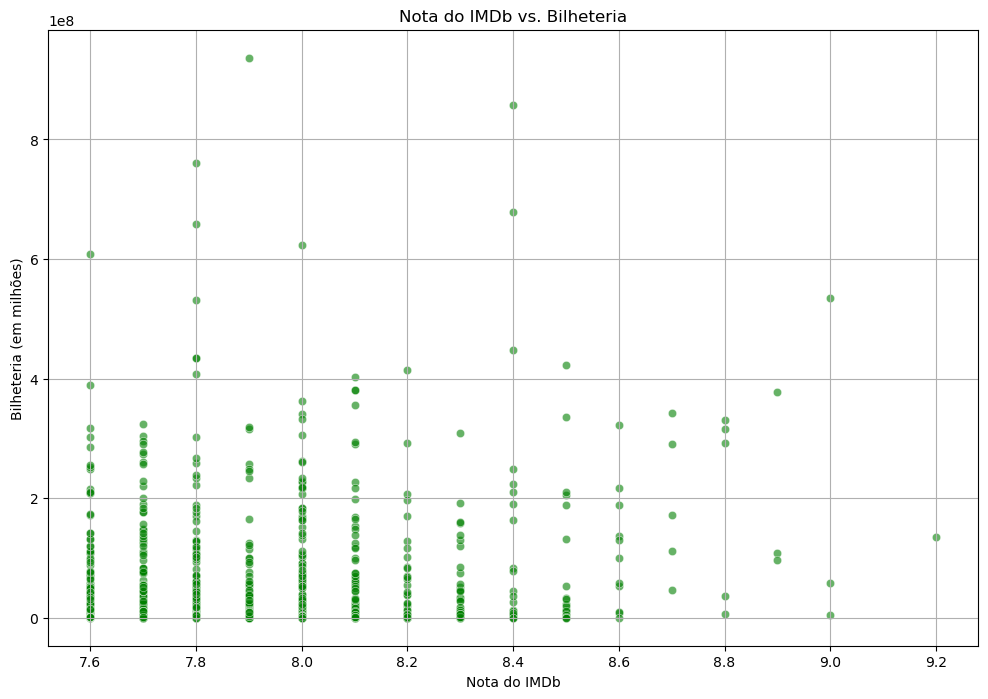


Matriz de Correlação:

             IMDB_Rating  Meta_score  No_of_Votes     Gross   Runtime
IMDB_Rating     1.000000    0.271374     0.479308  0.099393  0.242751
Meta_score      0.271374    1.000000    -0.020091 -0.030480 -0.031604
No_of_Votes     0.479308   -0.020091     1.000000  0.589527  0.172483
Gross           0.099393   -0.030480     0.589527  1.000000  0.140002
Runtime         0.242751   -0.031604     0.172483  0.140002  1.000000


In [7]:
# Gráfico de dispersão entre Nota e Bilheteria
plt.figure(figsize=(12, 8))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, color='green', alpha=0.6)
plt.title('Nota do IMDb vs. Bilheteria')
plt.xlabel('Nota do IMDb')
plt.ylabel('Bilheteria (em milhões)')
plt.grid(True)
plt.show()

# Calcula a matriz de correlação entre as variáveis numéricas
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
correlation_matrix = df[numeric_cols].corr()
print("\nMatriz de Correlação:\n")
print(correlation_matrix)

In [8]:
# Identifica os top 10 diretores com as maiores notas médias e contagem de filmes
top_directors = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print("Top 10 Diretores por Nota Média (min 5 filmes):\n")
print(top_directors[top_directors['count'] >= 5].head(10))

# Identifica os top 10 atores com as maiores bilheterias totais
top_actors_gross = df.groupby('Star1')['Gross'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Atores por Bilheteria Total:\n")
print(top_actors_gross)

Top 10 Diretores por Nota Média (min 5 filmes):

                          mean  count
Director                             
Christopher Nolan     8.462500      8
Francis Ford Coppola  8.400000      5
Peter Jackson         8.400000      5
Charles Chaplin       8.333333      6
Sergio Leone          8.266667      6
Stanley Kubrick       8.233333      9
Akira Kurosawa        8.220000     10
Quentin Tarantino     8.175000      8
Martin Scorsese       8.170000     10
Billy Wilder          8.144444      9

Top 10 Atores por Bilheteria Total:

Star1
Tom Hanks            2.493097e+09
Joe Russo            2.205039e+09
Leonardo DiCaprio    1.877322e+09
Daniel Radcliffe     1.835901e+09
Christian Bale       1.351591e+09
Robert Downey Jr.    1.150720e+09
Elijah Wood          1.035942e+09
Daisy Ridley         9.366622e+08
Mark Hamill          9.223406e+08
Craig T. Nelson      8.700228e+08
Name: Gross, dtype: float64


In [9]:
# Primeiro, vamos garantir que a coluna 'Genre' seja separada corretamente
all_genres = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Agora, agrupamos por gênero e calculamos as estatísticas das notas
genre_ratings = all_genres.groupby('Genre')['IMDB_Rating'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

# Imprime a tabela dos 10 gêneros com as maiores notas médias
print("Gêneros com as Maiores Notas Médias:")
print(genre_ratings.head(10))

# Imprime a tabela dos 10 gêneros com as menores notas médias
print("\nGêneros com as Menores Notas Médias:")
print(genre_ratings.tail(10))

Gêneros com as Maiores Notas Médias:
               mean  median  count
Genre                             
War        8.013725    8.00     51
Western    8.000000    7.95     20
Film-Noir  7.989474    8.00     19
Sci-Fi     7.977612    7.90     67
Mystery    7.967677    8.00     99
Drama      7.957538    7.90    723
Crime      7.954545    7.90    209
History    7.953571    7.95     56
Adventure  7.952041    7.90    196
Action     7.948677    7.90    189

Gêneros com as Menores Notas Médias:
               mean  median  count
Genre                             
Biography  7.935780    7.90    109
Fantasy    7.931818    7.90     66
Animation  7.930488    7.90     82
Sport      7.926316    7.90     19
Romance    7.925600    7.90    125
Music      7.914286    7.90     35
Family     7.912500    7.80     56
Thriller   7.909489    7.90    137
Comedy     7.903433    7.90    233
Horror     7.887500    7.85     32


In [10]:
from scipy import stats

# Filtra os dados para dois gêneros
drama_ratings = all_genres[all_genres['Genre'] == 'Drama']['IMDB_Rating']
action_ratings = all_genres[all_genres['Genre'] == 'Action']['IMDB_Rating']

# Realiza o teste T de Student para comparar as médias
t_statistic, p_value = stats.ttest_ind(drama_ratings, action_ratings, equal_var=False)

print(f"Estatística T: {t_statistic:.2f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusão: A diferença na nota média entre Drama e Ação é estatisticamente significativa.")
else:
    print("\nConclusão: A diferença na nota média não é estatisticamente significativa.")

Estatística T: 0.37
P-valor: 0.7116

Conclusão: A diferença na nota média não é estatisticamente significativa.


In [11]:
# Filtra filmes com mais de um certo número de votos para garantir relevância
df_filtered = df[df['No_of_Votes'] > 100000]

# Ordena os filmes pela nota do IMDb e, em seguida, pelo número de votos
top_movies = df_filtered.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False])

# Mostra os 5 filmes mais recomendados
print("Filmes que eu recomendaria para uma pessoa que eu não conheço:")
print(top_movies[['Series_Title', 'Released_Year', 'IMDB_Rating', 'No_of_Votes']].head(5))


Filmes que eu recomendaria para uma pessoa que eu não conheço:
             Series_Title Released_Year  IMDB_Rating  No_of_Votes
0           The Godfather          1972          9.2      1620367
1         The Dark Knight          2008          9.0      2303232
2  The Godfather: Part II          1974          9.0      1129952
3            12 Angry Men          1957          9.0       689845
5            Pulp Fiction          1994          8.9      1826188


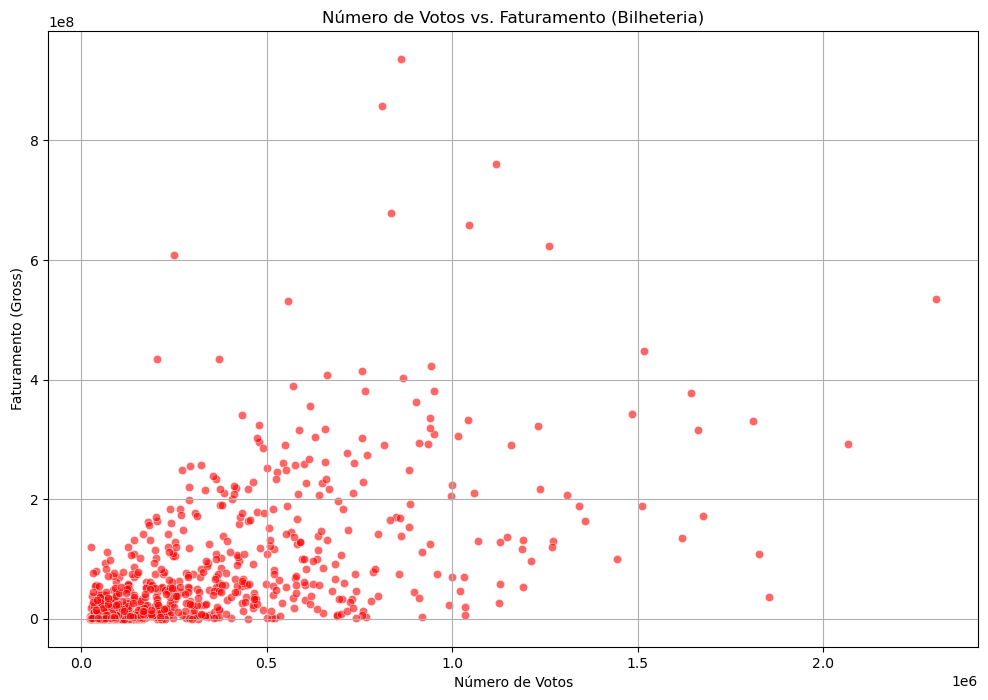

Os 10 Diretores com maior faturamento total:
Director
Steven Spielberg     2.478133e+09
Anthony Russo        2.205039e+09
Christopher Nolan    1.937454e+09
James Cameron        1.748237e+09
Peter Jackson        1.597312e+09
J.J. Abrams          1.423171e+09
Brad Bird            1.099628e+09
Robert Zemeckis      1.049446e+09
David Yates          9.789537e+08
Pete Docter          9.393821e+08
Name: Gross, dtype: float64


Os 10 Gêneros com maior faturamento total:
Genre
Adventure    2.817432e+10
Drama        2.746928e+10
Action       2.203333e+10
Comedy       1.224793e+10
Sci-Fi       9.029610e+09
Animation    8.573824e+09
Crime        6.956304e+09
Thriller     6.454429e+09
Fantasy      6.082543e+09
Biography    5.304578e+09
Name: Gross, dtype: float64


In [12]:
# 1. Análise da relação entre popularidade (votos) e faturamento
plt.figure(figsize=(12, 8))
sns.scatterplot(x='No_of_Votes', y='Gross', data=df, color='red', alpha=0.6)
plt.title('Número de Votos vs. Faturamento (Bilheteria)')
plt.xlabel('Número de Votos')
plt.ylabel('Faturamento (Gross)')
plt.grid(True)
plt.show()

# 2. Identifica os 10 diretores com maior faturamento total
top_directors_gross = df.groupby('Director')['Gross'].sum().sort_values(ascending=False).head(10)
print("Os 10 Diretores com maior faturamento total:")
print(top_directors_gross)

print("\n")

# 3. Identifica os 10 gêneros com maior faturamento total
all_genres_gross = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
top_genres_gross = all_genres_gross.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(10)
print("Os 10 Gêneros com maior faturamento total:")
print(top_genres_gross)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# O caminho completo para o arquivo.
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

# Carregando o DataFrame a partir do caminho completo.
df = pd.read_csv(caminho_do_arquivo)

# --- 1. Tratamento de Dados Numéricos ---

# Limpeza da coluna 'Gross'
# Primeiro, preenche os valores NaN com uma string vazia para evitar erros
df['Gross'] = df['Gross'].astype(str).fillna('').str.replace(',', '', regex=True).str.replace('$', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce') # Converte para número, e falhas viram NaN
df['Gross'] = df['Gross'].fillna(0) # Trata os NaN resultantes da conversão

# Limpeza da coluna 'Runtime'
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=True).str.strip()
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Runtime'] = df['Runtime'].fillna(0)

# Trata valores ausentes de 'Meta_score'
df['Meta_score'] = df['Meta_score'].fillna(0)

# --- 2. Tratamento de Dados Categóricos (Strings) ---

# Colunas categóricas para tratamento
categorical_cols = ['Director', 'Star1', 'Certificate', 'Genre', 'Released_Year']

# Trata valores ausentes e converte para número usando LabelEncoder
for col in categorical_cols:
    df[col] = df[col].astype(str).fillna('Desconhecido')
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])

# --- 3. Treinamento e Avaliação do Modelo ---

# Definir as features (variáveis de entrada) e o alvo (nota do IMDb)
features = df[['No_of_Votes', 'Gross', 'Runtime', 'Meta_score', 'Director_encoded', 'Star1_encoded', 'Certificate_encoded', 'Genre_encoded', 'Released_Year_encoded']].copy()
target = df['IMDB_Rating'].copy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"R-quadrado (R²): {r2:.2f}")

# Exemplo de uma previsão (mostra a previsão para as primeiras 5 entradas do teste)
print("\nPrimeiras 5 notas previstas vs. notas reais:")
for i in range(5):
    print(f"Prevista: {y_pred[i]:.2f} | Real: {y_test.iloc[i]:.2f}")

# Salvar o modelo em um arquivo .pkl
joblib.dump(model, 'modelo_previsao_imdb.pkl')
print("\nModelo salvo como 'modelo_previsao_imdb.pkl'")

Erro Quadrático Médio (MSE): 0.04
R-quadrado (R²): 0.33

Primeiras 5 notas previstas vs. notas reais:
Prevista: 8.05 | Real: 8.00
Prevista: 7.72 | Real: 7.70
Prevista: 8.18 | Real: 8.10
Prevista: 8.12 | Real: 8.10
Prevista: 7.72 | Real: 7.70

Modelo salvo como 'modelo_previsao_imdb.pkl'


In [12]:
import pandas as pd
import joblib
from sklearn.preprocessing import OrdinalEncoder

# O caminho completo para o arquivo.
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

# Carregue o modelo salvo
model = joblib.load('modelo_previsao_imdb.pkl')

# Crie um DataFrame com os dados do filme para predição
novo_filme_data = {
    'No_of_Votes': [2343110],
    'Gross': [28341469],
    'Runtime': [142],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Certificate': ['R'], # Adicionado com base na pesquisa
    'Genre': ['Crime, Drama'], # Adicionado com base na pesquisa
    'Released_Year': ['1994'] # Adicionado com base na pesquisa
}

novo_filme_df = pd.DataFrame(novo_filme_data)

# Carregue o DataFrame original para treinar os OrdinalEncoders novamente
df_original = pd.read_csv(caminho_do_arquivo)

# Liste as colunas categóricas
categorical_cols = ['Director', 'Star1', 'Certificate', 'Genre', 'Released_Year']

# Trate valores ausentes e treine os OrdinalEncoders para todas as colunas categóricas
encoders = {}
for col in categorical_cols:
    df_original[col] = df_original[col].astype(str).fillna('Desconhecido')
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    encoder.fit(df_original[[col]])
    encoders[col] = encoder
    novo_filme_df[f'{col}_encoded'] = encoders[col].transform(novo_filme_df[[col]])

# Selecione as colunas usadas no treinamento do modelo
features_para_prever = novo_filme_df[['No_of_Votes', 'Gross', 'Runtime', 'Meta_score', 'Director_encoded', 'Star1_encoded', 'Certificate_encoded', 'Genre_encoded', 'Released_Year_encoded']]

# Faça a previsão
previsao_nota = model.predict(features_para_prever)

print(f"A nota do IMDb prevista para The Shawshank Redemption é: {previsao_nota[0]:.2f}")

A nota do IMDb prevista para The Shawshank Redemption é: 9.31


C:\Users\rodri\AppData\Local\Temp\ipykernel_14112\833547209.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df, palette='Set2')


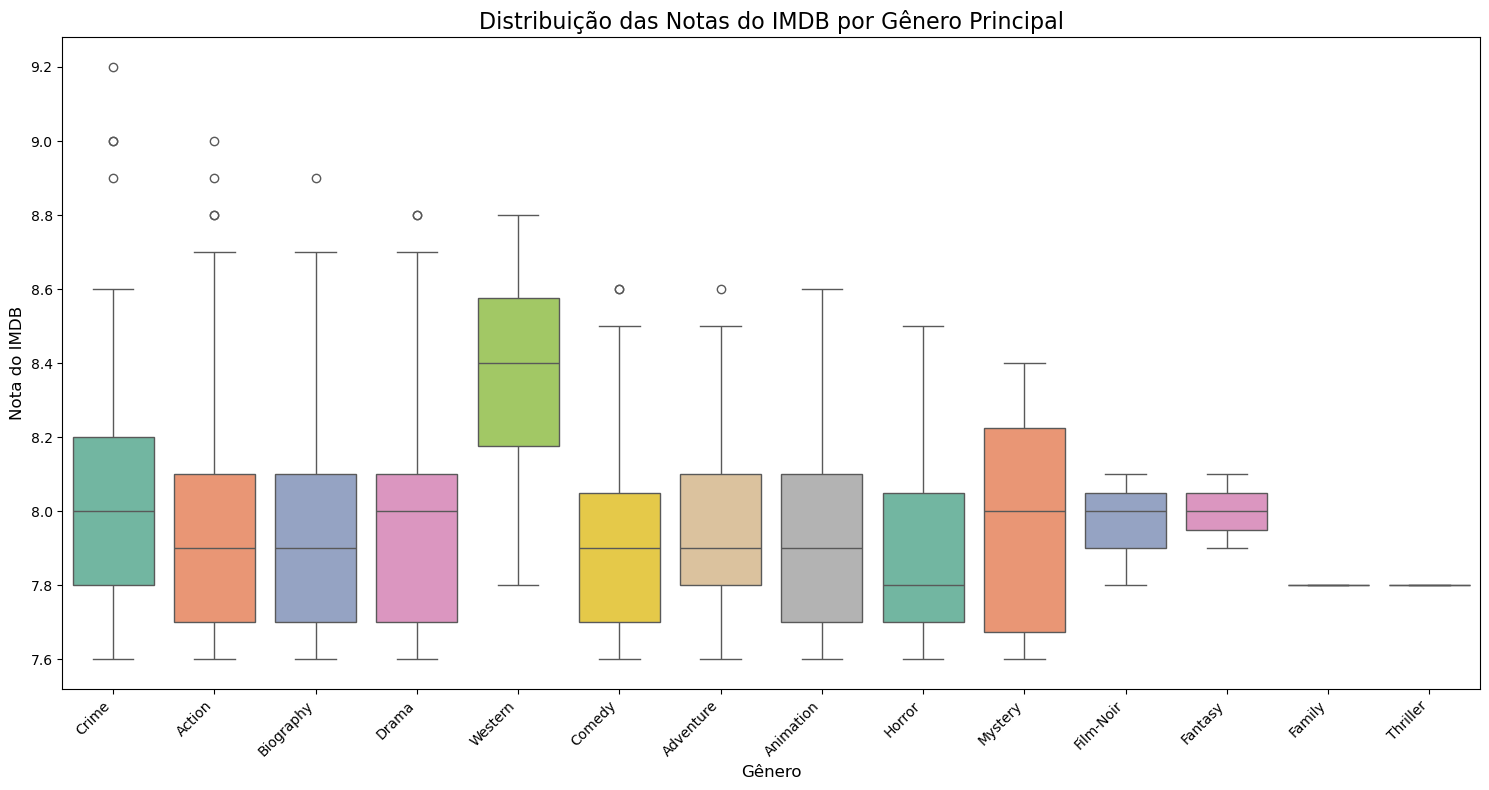

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo CSV
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

# Carrega o DataFrame
df = pd.read_csv(caminho_do_arquivo)

# Trata a coluna 'Genre' pegando apenas o primeiro gênero de cada filme
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Cria um Box Plot para visualizar a distribuição das notas por gênero
plt.figure(figsize=(15, 8))
sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df, palette='Set2')
plt.title('Distribuição das Notas do IMDB por Gênero Principal', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Nota do IMDB', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

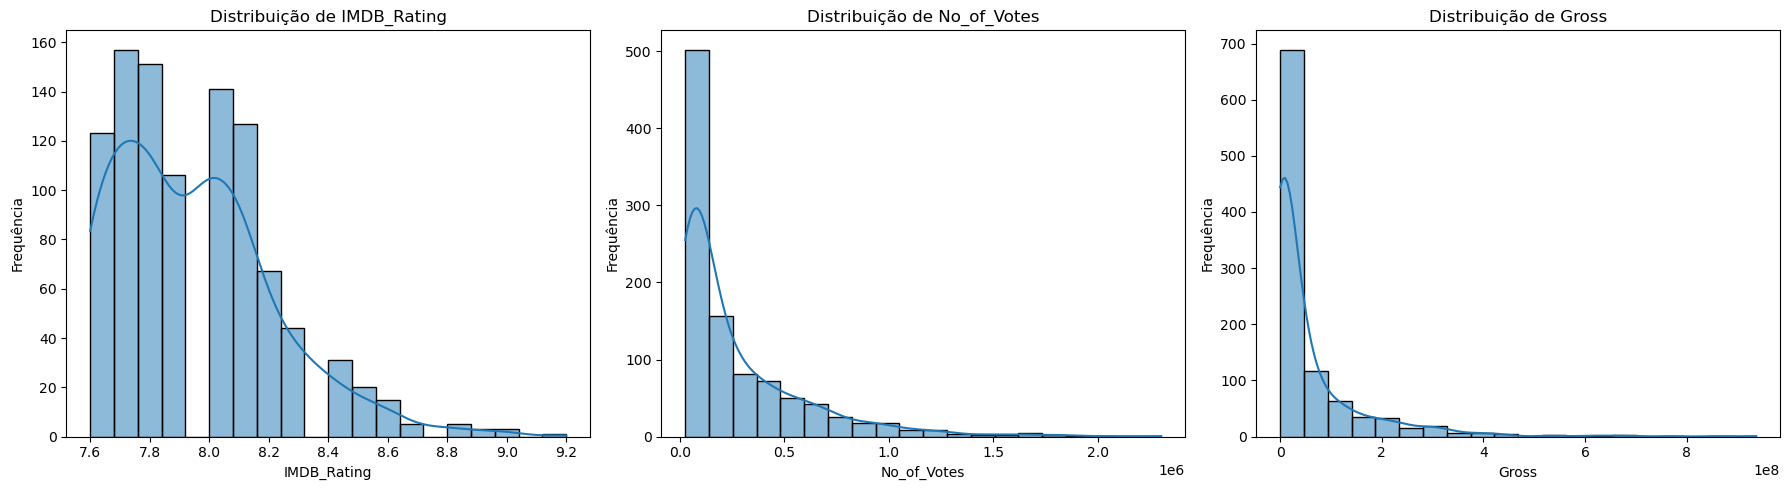

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo CSV
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

# Carrega o DataFrame
df = pd.read_csv(caminho_do_arquivo)

# Limpeza e conversão das colunas Gross e Runtime
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(0)

# Lista de colunas para plotar os histogramas
colunas_para_histograma = ['IMDB_Rating', 'No_of_Votes', 'Gross']

# Cria subplots para cada histograma
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plota um histograma para cada coluna
for i, coluna in enumerate(colunas_para_histograma):
    sns.histplot(df[coluna], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {coluna}')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Caminho para o arquivo CSV
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'

# Carrega o DataFrame
df = pd.read_csv(caminho_do_arquivo)

# --- Preparação dos Dados ---
# 1. Limpeza e conversão das colunas numéricas
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['No_of_Votes'] = df['No_of_Votes'].fillna(df['No_of_Votes'].mean())

# 2. Prepara as colunas categóricas para codificação
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
df['Director'] = df['Director'].fillna('Desconhecido')
df['Star1'] = df['Star1'].fillna('Desconhecido')
df['Genre'] = df['Genre'].fillna('Desconhecido')

# 3. Codifica as variáveis categóricas usando OrdinalEncoder
encoder_director = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Director_encoded'] = encoder_director.fit_transform(df[['Director']])

encoder_star1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Star1_encoded'] = encoder_star1.fit_transform(df[['Star1']])

encoder_genre = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Genre_encoded'] = encoder_genre.fit_transform(df[['Genre']])

# 4. Definir as variáveis de entrada (features) e a variável de saída (target)
features = df[['IMDB_Rating', 'No_of_Votes', 'Meta_score', 'Director_encoded', 'Star1_encoded', 'Genre_encoded']]
target = df['Gross']

# 5. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# --- Treinamento do Modelo Random Forest ---
# Usamos 100 árvores de decisão para o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Análise e Avaliação ---
y_pred = model.predict(X_test)

# Calcular o R-quadrado e o MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-quadrado (R²): {r2:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

# Exibir a importância das variáveis do modelo
print("\n--- Importância das Variáveis (Feature Importance) ---")
feature_importances = pd.DataFrame({'Variável': features.columns, 'Importância': model.feature_importances_})
print(feature_importances.sort_values(by='Importância', ascending=False))

R-quadrado (R²): 0.60
Erro Quadrático Médio (MSE): 3979386579770856.50

--- Importância das Variáveis (Feature Importance) ---
           Variável  Importância
1       No_of_Votes     0.485071
5     Genre_encoded     0.152317
3  Director_encoded     0.110276
0       IMDB_Rating     0.091543
4     Star1_encoded     0.084739
2        Meta_score     0.076054


In [20]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Caminho para o arquivo CSV original
caminho_do_arquivo = 'C:/Users/rodri/Downloads/Copy of desafio_indicium_imdb - Copy of desafio_indicium_imdb.csv'
df = pd.read_csv(caminho_do_arquivo)

# --- Preparação dos Dados Originais (para treinar os encoders) ---
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['No_of_Votes'] = df['No_of_Votes'].fillna(df['No_of_Votes'].mean())

df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
df['Director'] = df['Director'].fillna('Desconhecido')
df['Star1'] = df['Star1'].fillna('Desconhecido')
df['Genre'] = df['Genre'].fillna('Desconhecido')

# 3. Codifica as variáveis categóricas usando OrdinalEncoder
encoder_director = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Director_encoded'] = encoder_director.fit_transform(df[['Director']])
encoder_star1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Star1_encoded'] = encoder_star1.fit_transform(df[['Star1']])
encoder_genre = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Genre_encoded'] = encoder_genre.fit_transform(df[['Genre']])
encoder_certificate = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Certificate_encoded'] = encoder_certificate.fit_transform(df[['Certificate']])
encoder_released_year = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['Released_Year_encoded'] = encoder_released_year.fit_transform(df[['Released_Year']])
df['Runtime_encoded'] = df['Runtime'].str.replace(' min', '').astype(float)


# --- Treinamento e salvamento do modelo RFR ---
features = df[['No_of_Votes', 'Gross', 'Runtime_encoded', 'Meta_score', 'Director_encoded', 'Star1_encoded', 'Certificate_encoded', 'Genre_encoded', 'Released_Year_encoded']]
target = df['IMDB_Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, 'modelo_previsao_imdb.pkl')

# --- PREVISÃO PARA O NOVO FILME ---
# Dados do novo filme a ser previsto
novo_filme_data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'No_of_Votes': [2343110],
    'Gross': [28341469]
}

novo_filme_df = pd.DataFrame(novo_filme_data)

# Prepara os dados do novo filme da mesma forma que o modelo foi treinado
novo_filme_df['Gross'] = novo_filme_df['Gross'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
novo_filme_df['Gross'] = pd.to_numeric(novo_filme_df['Gross'], errors='coerce')
novo_filme_df['Gross'] = novo_filme_df['Gross'].fillna(df['Gross'].mean())
novo_filme_df['Meta_score'] = novo_filme_df['Meta_score'].fillna(df['Meta_score'].mean())
novo_filme_df['No_of_Votes'] = novo_filme_df['No_of_Votes'].fillna(df['No_of_Votes'].mean())

novo_filme_df['Genre'] = novo_filme_df['Genre'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan)
novo_filme_df['Director'] = novo_filme_df['Director'].fillna('Desconhecido')
novo_filme_df['Star1'] = novo_filme_df['Star1'].fillna('Desconhecido')
novo_filme_df['Genre'] = novo_filme_df['Genre'].fillna('Desconhecido')

# Codifica as variáveis categóricas do novo filme
novo_filme_df['Director_encoded'] = encoder_director.transform(novo_filme_df[['Director']])
novo_filme_df['Star1_encoded'] = encoder_star1.transform(novo_filme_df[['Star1']])
novo_filme_df['Genre_encoded'] = encoder_genre.transform(novo_filme_df[['Genre']])
novo_filme_df['Certificate_encoded'] = encoder_certificate.transform(novo_filme_df[['Certificate']])
novo_filme_df['Released_Year_encoded'] = encoder_released_year.transform(novo_filme_df[['Released_Year']])
novo_filme_df['Runtime_encoded'] = novo_filme_df['Runtime'].str.replace(' min', '').astype(float)


# Seleciona as features que o modelo espera
features_para_prever = novo_filme_df[['No_of_Votes', 'Gross', 'Runtime_encoded', 'Meta_score', 'Director_encoded', 'Star1_encoded', 'Certificate_encoded', 'Genre_encoded', 'Released_Year_encoded']]

# Carrega o modelo salvo
modelo_salvo = joblib.load('modelo_previsao_imdb.pkl')

# Faz a previsão
previsao_nota = modelo_salvo.predict(features_para_prever)

print(f"A nota do IMDB prevista para 'The Shawshank Redemption' é: {previsao_nota[0]:.2f}")

A nota do IMDB prevista para 'The Shawshank Redemption' é: 8.77
